In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
bed_occupancy_data=pd.read_csv('bed_occupancy.csv')
#Preview the dataset
print(bed_occupancy_data.head())

   admission  day  discharge  occupancy_rate
0        150  5.2       0.95            0.85
1        120  4.8       0.92            0.78
2        170  5.5       0.90            0.88
3        130  5.0       0.93            0.82
4        160  5.4       0.94            0.87


In [4]:
#Prepare Data
x=bed_occupancy_data[['admission','discharge']]
y=bed_occupancy_data['occupancy_rate']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
#Train Model
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [7]:
#Evaluate the model
occupancy_predictions=regressor.predict(x_test)
mae=mean_absolute_error(y_test,occupancy_predictions)
print("Bed Occupancy Forecasting MAE:",mae)

Bed Occupancy Forecasting MAE: 0.027200000000000057


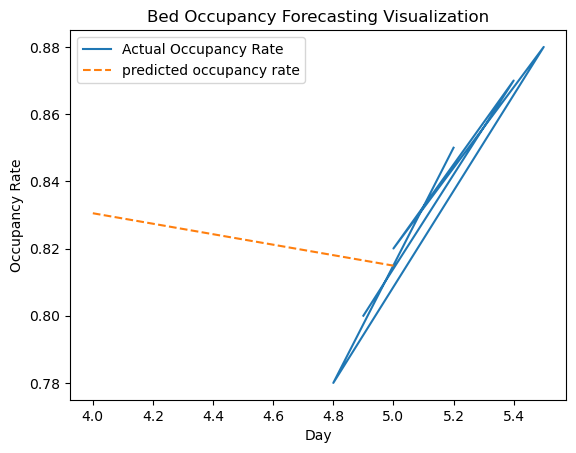

In [8]:
#Visualization
plt.plot(bed_occupancy_data['day'],bed_occupancy_data['occupancy_rate'],label='Actual Occupancy Rate')
plt.plot(np.arange(len(y_test))+len(y_train),occupancy_predictions,label='predicted occupancy rate',linestyle='--')
plt.title('Bed Occupancy Forecasting Visualization')
plt.xlabel('Day')
plt.ylabel('Occupancy Rate')
plt.legend()
plt.show()